<a href="https://colab.research.google.com/github/shanksms/pandas_master_repo/blob/main/introducing_scikit_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data representation in scikit

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Here each row of the data represents a single observed flower and number of rows represent total number of flowers for which we took sample.
In general, number of rows of a matrix are represented as n_samples.  
    
Likewise each column refers to a particular quantitative piece of information that describes each sample.  We refer number columns of a matrix as n_features.


  



**The Features Matrix**  

The table layout makes it clear that information can be thought of as a two dimensional numerical matrix. the shape of matrix will be **(n_samples, n_features)**  By convention, feature matrix is denoted by X.
The samples (i.e., rows) always refer to the individual objects described by the dataset. For example, a sample might represent a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.  

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Features are often real-valued, but may be Boolean or discrete-valued in some cases.

**The Target Array**  
Target array is (n_samples, ) one dimension array. It contains the labels of training data and is represented by y.

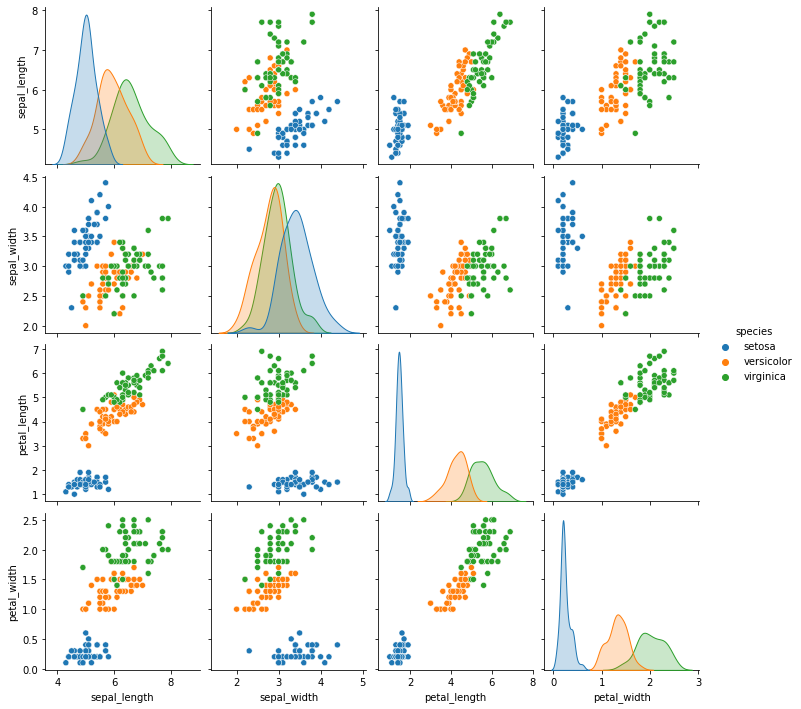

In [3]:
%matplotlib inline
sns.pairplot(iris, hue='species')


In [4]:
#Let's extract feature matrix and target array from the dataframe
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
print(X_iris.head())
y_iris = iris.loc[:, 'species'] # y_iris = iris.loc[:, ['species']] returns a dataframe of size (n, 1)
print(y_iris.shape)
print(y_iris.head())



(150, 4)
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
(150,)
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


# The Estimator API  



**Basics of the API**  
Most commonly, the steps in using the Scikit-Learn Estimator API are as follows:

Choose a class of model by importing the appropriate estimator class from Scikit-Learn.

Choose model hyperparameters by instantiating this class with desired values.

Arrange data into a features matrix and target vector, as outlined earlier in this chapter.

Fit the model to your data by calling the fit method of the model instance.

Apply the model to new data:

For supervised learning, often we predict labels for unknown data using the predict method.

For unsupervised learning, we often transform or infer properties of the data using the transform or predict method

**Supervised learning example - simple linear regression**  


type <class 'numpy.ndarray'> shape (50,)
type <class 'numpy.ndarray'> shape (50,)


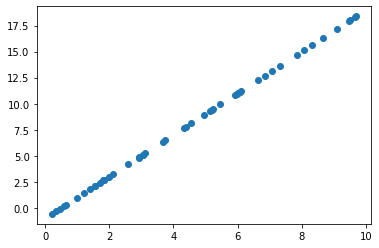

In [5]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 
print('type {} shape {}'.format(type(x), x.shape))
print('type {} shape {}'.format(type(y), y.shape))
plt.scatter(x, y)

1. **Choose a class of model**


In [6]:
from sklearn.linear_model import LinearRegression


2. **Choose model hyper parameters**  
An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

* Would we like to fit for the offset (i.e., y-intercept)?

* Would we like the model to be normalized?

* Would we like to preprocess our features to add model flexibility?

* What degree of regularization would we like to use in our model?

* How many model components would we like to use?

These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation



In [7]:
#For our linear regression example, we can instantiate the LinearRegression class 
#and specify that we’d like to fit the intercept using the fit_intercept hyperparameter:

model = LinearRegression(fit_intercept=True)


3. **Arrange data into a features matrix and target vector**  
X should be of shape (n_samples, n_features). here we have only one feature, so it should be (n_samples, 1). Y should be an one dimensional array.
Lets reshape X and bring it to (n_samples, 1) shape.


In [8]:
X = x[:, np.newaxis]
print(X.shape)

(50, 1)


4. **Fit the model to the data**

In [9]:
model.fit(X, y)

LinearRegression()

In Scikit-Learn, by convention all model parameters that were learned during the fit process have trailing underscores; for example in this linear model, we have the following:

In [10]:
print(model.coef_)
print(model.intercept_)

[2.]
-1.0000000000000036


These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing the results to the data definition, we see that they are close  to the values used to generate the data: a slope of 2 and intercept of –1.

5. **Predict labels for unknown data**



In [11]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)


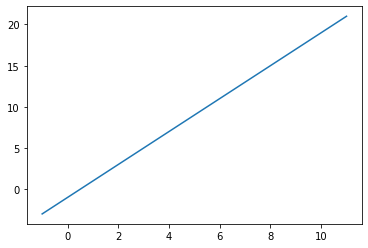

In [12]:
plt.plot(Xfit, yfit)

**Supervised Learning Example: Iris Classification**  

For this task, we will use a simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see Chapter 41 for more details). Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [14]:
from sklearn.naive_bayes import GaussianNB # 1. Choose model class
model = GaussianNB() # 2. instantiate model 
model.fit(X_train, y_train) # 3. Train model
y_model = model.predict(X_test) # 4. Predict the model


Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true values:

In [15]:
from sklearn.metrics import accuracy_score
print(y_test.shape)
print(y_model.shape)
accuracy_score(y_test, y_model)

(38,)
(38,)


0.9736842105263158

**Unsupervised learning example: Iris dimensionality**  
Let us try to reduce the dimensionality of Iris dataset so that it is easy to visualize.  
Dimensionality reduction involves reducing dimensions to a lower value while retaining the essential features. Often it is used so that visualization is easy. e.g. it is easier to plot data in 2D instead of 4D.  

Here we will use principal component analysis (PCA; see Chapter 45), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.


In [21]:
from sklearn.decomposition import PCA # Choose the model
model = PCA(n_components=2) # instantiate the model
model.fit(X_iris) # fit the model to data
X_2D = model.transform(X_iris) # Transform the data
print(X_2D.shape)
print(type(X_2D))

(150, 2)
<class 'numpy.ndarray'>


In [22]:
# Assign new dimensions to original iris 2darray
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]


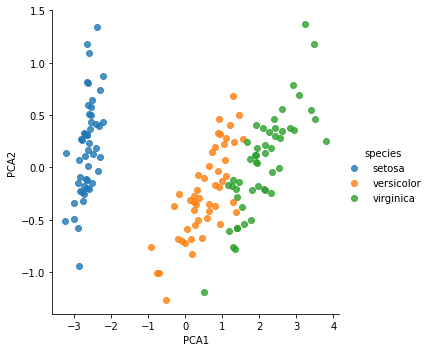

In [24]:
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', fit_reg=False)

We see that in the two-dimensional representation, the species are fairly well   separated, even though the PCA algorithm had no knowledge of the species   labels! This suggests to us that a relatively straightforward   classification will probably be effective on the dataset, as we saw before.  

**Unsupervised Learning Example: Iris Clustering**


Let’s next look at applying clustering to the Iris data. A clustering  

algorithm   attempts to find distinct groups of data without reference to any

labels. Here we will use a powerful clustering method called a Gaussian 

mixture   model (GMM), discussed in more detail in Chapter 48. A GMM attempts   to model the data as a collection of Gaussian blobs.  

We can fit the Gaussian mixture model as follows: 

In [25]:
from sklearn.mixture import GaussianMixture      # 1. choose model class
model = GaussianMixture(n_components=3, covariance_type='full')  # 2. instantiate model
model.fit(X_iris)                                # 3. fit model to data
y_gmm = model.predict(X_iris)                    # 4. determine labels

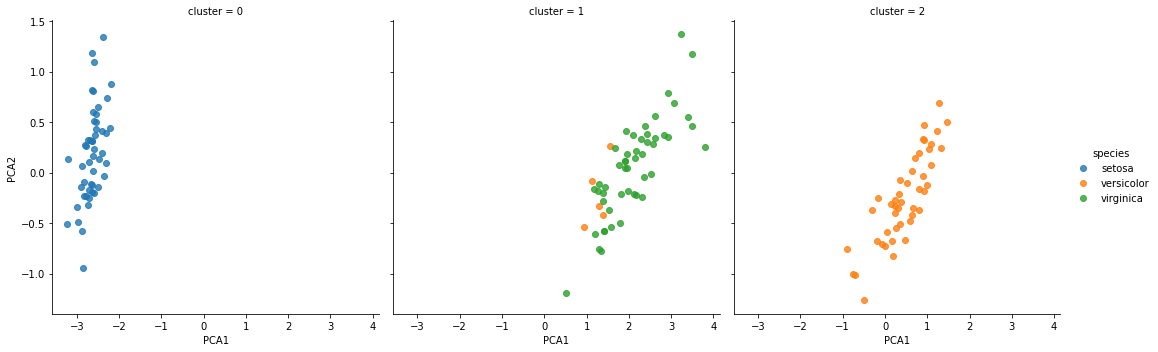

In [26]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

# Application: Exploring hand written digits